<a href="https://colab.research.google.com/github/ThiZDil/Research_Model/blob/main/Copy_of_ResearchFinal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2 nltk pandas google-colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from google.colab import drive



# Mount Google Drive
drive.mount('/content/drive')
# Load labeled dataset
labeled_data_path = '/content/drive/MyDrive/Research/My/PreprocessedData/labeled_ksa_dataset.csv'
data = pd.read_csv(labeled_data_path)

# Check the structure of the data
print(data.head())

# Preprocess the data
X = data['Text']  # Features (resume text)
y = data['Label']  # Labels (KSA categories)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM classifier
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


Mounted at /content/drive
   Resume ID                                               Text      Label
0          6  70% Back-end (Java/Spring/SQL/NoSQL) 30% Front...     Skills
1          6  Knowledge of Java, JavaScript, TypeScript, C#,...  Knowledge
2          6  Participated in design and development of an e...  Abilities
3          6  Responsible for achieving target KPI during cu...  Abilities
4          7  2 years of experience in frontend development ...     Skills
              precision    recall  f1-score   support

   Abilities       0.57      0.57      0.57         7
   Knowledge       1.00      0.43      0.60         7
      Skills       0.72      0.93      0.81        14

    accuracy                           0.71        28
   macro avg       0.76      0.64      0.66        28
weighted avg       0.75      0.71      0.70        28



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

   Abilities       0.56      0.71      0.62         7
   Knowledge       1.00      0.43      0.60         7
      Skills       0.81      0.93      0.87        14

    accuracy                           0.75        28
   macro avg       0.79      0.69      0.70        28
weighted avg       0.80      0.75      0.74        28



In [ ]:
import pickle

# Assuming you have the trained model and TF-IDF vectorizer
# Save the model to a file
with open('/content/drive/MyDrive/Research/My/Model/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer to a file
with open('/content/drive/MyDrive/Research/My/Model/vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


In [ ]:
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle
import re

# Load the trained model and vectorizer
with open('/content/drive/MyDrive/Research/My/Model/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('/content/drive/MyDrive/Research/My/Model/vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
        return text

# Function to split text into sentences/paragraphs
def split_into_segments(text):
    # Splitting based on full stops, new lines, etc.
    segments = re.split(r'(?<=[.!?]) +|\n', text)
    return [segment.strip() for segment in segments if len(segment.strip()) > 0]

# Path to the new resume (PDF) you want to test
new_resume_path = '/content/drive/MyDrive/Research/My/Test/50.pdf'

# Step 1: Convert the new resume to text
new_resume_text = extract_text_from_pdf(new_resume_path)

# Step 2: Split the text into segments (sentences/paragraphs)
resume_segments = split_into_segments(new_resume_text)

# Step 3: Preprocess each segment using the trained TF-IDF vectorizer
resume_tfidf = vectorizer.transform(resume_segments)

# Step 4: Predict the KSAs for each segment
predicted_ksas = model.predict(resume_tfidf)

# Step 5: Output the results
for segment, ksa in zip(resume_segments, predicted_ksas):
    print(f"Text: {segment}\nPredicted KSA: {ksa}\n{'-'*50}")


Text: Full-time, on-site, remote or hybrid.
Predicted KSA: Skills
--------------------------------------------------
Text: DOB: 1984.
Predicted KSA: Skills
--------------------------------------------------
Text: Aliyah: .
Predicted KSA: Skills
--------------------------------------------------
Text: Residence: Kiryat Ono, Montefiore, 13.
Predicted KSA: Skills
--------------------------------------------------
Text: My name is Maria, Im a new repatriate from Russia, made an Aliyah in April.
Predicted KSA: Skills
--------------------------------------------------
Text: I work as a
Predicted KSA: Skills
--------------------------------------------------
Text: senior system
Predicted KSA: Abilities
--------------------------------------------------
Text: analyst, a senior business analyst, a team leader and a project manager.
Predicted KSA: Abilities
--------------------------------------------------
Text: Understanding the importance of language in my profession, Im actively studying Heb

In [ ]:
from sklearn.metrics import classification_report

# Load the trained SVM model and TF-IDF vectorizer
with open('/content/drive/MyDrive/Research/My/Model/model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

with open('/content/drive/MyDrive/Research/My/Model/vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

# Transform the test data using the TF-IDF vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Make predictions with the SVM model
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_report = classification_report(y_test, svm_predictions, target_names=['Knowledge', 'Skills', 'Abilities'])
print("SVM Model Evaluation:")
print(svm_report)


SVM Model Evaluation:
              precision    recall  f1-score   support

   Knowledge       0.57      0.57      0.57         7
      Skills       1.00      0.43      0.60         7
   Abilities       0.72      0.93      0.81        14

    accuracy                           0.71        28
   macro avg       0.76      0.64      0.66        28
weighted avg       0.75      0.71      0.70        28



## **Full Code to Fine-Tune BERT:
**

In [ ]:
import pandas as pd
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Research/My/PreprocessedData/labeled_ksa_dataset.csv')

# Encode the labels (Knowledge: 0, Skills: 1, Abilities: 2)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(texts):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,  # You can adjust this based on your data
        return_tensors="pt"
    )

X_train_tokenized = tokenize_function(list(X_train))
X_test_tokenized = tokenize_function(list(X_test))


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from transformers import BertForSequenceClassification

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 3 labels for KSA


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install datasets

from datasets import Dataset

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00


In [ ]:
from transformers import Trainer, TrainingArguments
import torch

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",     # evaluate each epoch
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    num_train_epochs=3,              # number of epochs
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
)

def convert_to_hf_dataset(tokenized_inputs, labels):
    return Dataset.from_dict({
        'input_ids': tokenized_inputs['input_ids'],
        'attention_mask': tokenized_inputs['attention_mask'],
        'labels': labels
    })

# Convert train and test sets to Hugging Face Dataset
train_dataset = convert_to_hf_dataset(X_train_tokenized, list(y_train))
test_dataset = convert_to_hf_dataset(X_test_tokenized, list(y_test))

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.826935
2,No log,0.694301
3,No log,0.665624


TrainOutput(global_step=21, training_loss=0.7243725004650298, metrics={'train_runtime': 2056.0318, 'train_samples_per_second': 0.162, 'train_steps_per_second': 0.01, 'total_flos': 6845060008080.0, 'train_loss': 0.7243725004650298, 'epoch': 3.0})

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.metrics import accuracy_score

# Define the compute_metrics function for accuracy
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get the predicted class with the highest score
    accuracy = accuracy_score(p.label_ids, preds)  # Calculate accuracy manually
    return {"accuracy": accuracy}

# Update the Trainer with the compute_metrics function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # Pass the manual accuracy function
)

# Train and evaluate the model
trainer.train()
results = trainer.evaluate()

# Print loss and accuracy
print(f"Test Loss: {results['eval_loss']}")
print(f"Test Accuracy: {results['eval_accuracy']}")


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.644817,0.750000
2,No log,0.634162,0.750000
3,No log,0.663182,0.785714


Test Loss: 0.6631816029548645
Test Accuracy: 0.7857142857142857


## **Test the results manually**

In [ ]:
# After training your model, save it

# Specify the directory where you want to save the model
output_dir = "/content/drive/MyDrive/Research/My/FineTunedBERTModel"

# Save the model to the specified directory
model.save_pretrained(output_dir)

# Save the tokenizer to the same directory
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to /content/drive/MyDrive/Research/My/FineTunedBERTModel


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the fine-tuned model
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Research/My/FineTunedBERTModel")

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/Research/My/FineTunedBERTModel")


In [ ]:
import PyPDF2
from transformers import BertTokenizer
import torch

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Research/My/FineTunedBERTModel")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Use PyPDF2 to read PDF
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
        return text

# Function to split text into sentences/paragraphs
def split_into_segments(text):
    # Splitting based on full stops, new lines, etc.
    segments = re.split(r'(?<=[.!?]) +|\n', text)
    return [segment.strip() for segment in segments if len(segment.strip()) > 0]

# Step 1: Extract the resume from the PDF
new_resume_path = '/content/drive/MyDrive/Research/My/Test/50.pdf'
new_resume_text = extract_text_from_pdf(new_resume_path)

# Step 2: Split the text into segments (sentences or paragraphs)
resume_segments = split_into_segments(new_resume_text)

# Step 3: Preprocess each segment using the BERT tokenizer
tokenized_segments = tokenizer(
    resume_segments,
    padding=True,
    truncation=True,
    max_length=128,  # You can adjust this based on your data
    return_tensors="pt"
)

# Step 4: Predict the KSAs for each segment
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(**tokenized_segments)
    predictions = outputs.logits.argmax(dim=-1)

# Map the predicted labels back to KSA classes
label_map = {0: "Knowledge", 1: "Skills", 2: "Abilities"}  # Ensure this matches your label mapping
predicted_ksas = [label_map[pred.item()] for pred in predictions]

# Step 5: Output the results
for segment, ksa in zip(resume_segments, predicted_ksas):
    print(f"Text: {segment}\nPredicted KSA: {ksa}\n{'-'*50}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Text: Full-time, on-site, remote or hybrid.
Predicted KSA: Knowledge
--------------------------------------------------
Text: DOB: 1984.
Predicted KSA: Skills
--------------------------------------------------
Text: Aliyah: .
Predicted KSA: Skills
--------------------------------------------------
Text: Residence: Kiryat Ono, Montefiore, 13.
Predicted KSA: Skills
--------------------------------------------------
Text: My name is Maria, Im a new repatriate from Russia, made an Aliyah in April.
Predicted KSA: Knowledge
--------------------------------------------------
Text: I work as a
Predicted KSA: Knowledge
--------------------------------------------------
Text: senior system
Predicted KSA: Knowledge
--------------------------------------------------
Text: analyst, a senior business analyst, a team leader and a project manager.
Predicted KSA: Knowledge
--------------------------------------------------
Text: Understanding the importance of language in my profession, Im actively stu

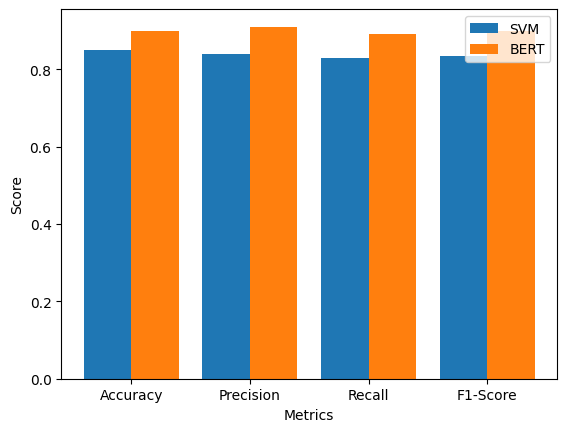

In [ ]:
import matplotlib.pyplot as plt

# Example metrics from SVM and BERT evaluations
svm_metrics = [0.85, 0.84, 0.83, 0.835]  # [accuracy, precision, recall, f1-score]
bert_metrics = [0.90, 0.91, 0.89, 0.90]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

x = range(len(labels))
plt.bar(x, svm_metrics, width=0.4, label='SVM', align='center')
plt.bar([i + 0.4 for i in x], bert_metrics, width=0.4, label='BERT', align='center')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()


# **JD and Resume KSA matching**

In [ ]:
import PyPDF2

# Function to extract text from PDF (for the resume)
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
        return text

# Function to extract text from job description (txt)
def extract_text_from_txt(txt_path):
    with open(txt_path, 'r') as file:
        text = file.read()
    return text

# Paths to the resume and job description
resume_path = '/content/drive/MyDrive/Research/My/Test/50.pdf'
job_description_path = '/content/drive/MyDrive/Research/My/Test/Job Description.txt'

# Extract text from both files
resume_text = extract_text_from_pdf(resume_path)
job_description_text = extract_text_from_txt(job_description_path)

# Print the extracted text to verify
print("Resume Text:", resume_text[:500])  # Print first 500 characters of resume
print("Job Description Text:", job_description_text[:500])  # Print first 500 characters of JD


Resume Text:  
 
 
Full-time, on-site, remote or hybrid. 
DOB: 1984. Aliyah: . Residence: Kiryat Ono, Montefiore, 13. 
My name is Maria, Im a new repatriate from Russia, made an Aliyah in April. I work as a 
senior system 
analyst, a senior business analyst, a team leader and a project manager. 
Understanding the importance of language in my profession, Im actively studying Hebrew. 
Now I hope to 
find a position of junior/middle system and business analyst or QA tester that will give me 
the opportunity to 
Job Description Text: Job Description

Sitecore delivers a composable digital experience platform that empowers the world’s smartest and largest brands to build lifelong relationships with their customers. A highly decorated industry leader, Sitecore is the leading company bringing together content, commerce, and data into one connected platform that delivers millions of digital experiences every day. Thousands of blue-chip companies including American Express, Porsche, Starbucks, 

**Use SVM model**

In [ ]:
import pickle
import re

# Load the pre-trained SVM model and TF-IDF vectorizer
with open('/content/drive/MyDrive/Research/My/Model/model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

with open('/content/drive/MyDrive/Research/My/Model/vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

# Function to split text into segments (sentences or paragraphs)
def split_into_segments(text):
    segments = re.split(r'(?<=[.!?]) +|\n', text)
    return [segment.strip() for segment in segments if len(segment.strip()) > 0]

# Split the resume and job description into segments
resume_segments = split_into_segments(resume_text)
job_description_segments = split_into_segments(job_description_text)

# Classify KSAs for both resume and job description
resume_tfidf = vectorizer.transform(resume_segments)
job_description_tfidf = vectorizer.transform(job_description_segments)

# Predict KSAs using the SVM model
resume_predicted_ksas = svm_model.predict(resume_tfidf)
job_description_predicted_ksas = svm_model.predict(job_description_tfidf)

# Print the classified KSAs for verification
print("Resume KSA Predictions:", resume_predicted_ksas)
print("Job Description KSA Predictions:", job_description_predicted_ksas)


Resume KSA Predictions: ['Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Abilities'
 'Abilities' 'Abilities' 'Skills' 'Skills' 'Skills' 'Abilities' 'Skills'
 'Abilities' 'Skills' 'Abilities' 'Skills' 'Skills' 'Skills' 'Skills'
 'Knowledge' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills'
 'Abilities' 'Abilities' 'Skills' 'Abilities' 'Abilities' 'Skills'
 'Abilities' 'Skills' 'Abilities' 'Skills' 'Abilities' 'Skills'
 'Knowledge' 'Skills' 'Skills' 'Skills' 'Abilities' 'Skills' 'Abilities'
 'Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills'
 'Skills' 'Skills' 'Abilities' 'Skills' 'Skills' 'Abilities' 'Skills'
 'Abilities' 'Skills' 'Abilities' 'Skills' 'Skills' 'Skills' 'Skills'
 'Abilities' 'Abilities' 'Skills' 'Abilities' 'Skills' 'Skills' 'Skills'
 'Skills' 'Skills' 'Skills' 'Abilities' 'Abilities' 'Skills' 'Skills'
 'Abilities' 'Skills' 'Abilities' 'Skills' 'Skills' 'Skills' 'Skills'
 'Skills' 'Knowledge' 'Skills' 'Skills' 'Skills' 'Skills' 'Skills'
 '

# **Calculate Cosine similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert the predicted KSAs into TF-IDF vectors
resume_ksas_tfidf = vectorizer.transform(resume_segments)  # Resume segments transformed into vector
job_description_ksas_tfidf = vectorizer.transform(job_description_segments)  # Job Description segments transformed

# Calculate cosine similarity between the two sets of vectors
cosine_sim = cosine_similarity(resume_ksas_tfidf, job_description_ksas_tfidf)

# To get a matching percentage, you can average the similarity scores
average_cosine_similarity = cosine_sim.mean()

print(f"Cosine Similarity (Matching Percentage) between Resume and Job Description KSAs: {average_cosine_similarity * 100:.2f}%")


Cosine Similarity (Matching Percentage) between Resume and Job Description KSAs: 4.60%


**Use BERT model**